# Kalman Filtering: Brownian Motion

We'll visualize a very simple example of the Kalman filter, when the state space model is Brownian motion. We'll start by generating a state-space trajectory and a set of noisy measurements. Then we'll see how the Kalman filtering process works.

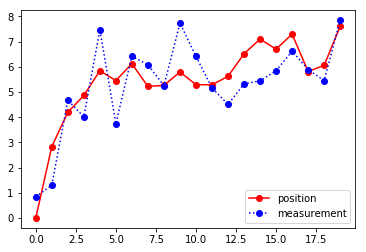

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Model and measurement noise
sigma_2 = 1
sigma_m_2 = 1

T = 20 #how long to simulate+track the system
x = np.zeros(T)
for t in range(1,T):
    x[t] = x[t-1] + np.sqrt(sigma_2)*np.random.randn()

y = x + np.sqrt(sigma_m_2)*np.random.randn(T)

plt.plot(np.arange(0,T),x,'ro-',label='position')
plt.plot(np.arange(0,T),y,'bo:',label='measurement')
plt.legend()
plt.show()

Next, we'll compute the prediction and measurement update sequences. The Kalman equations are rather straightforward, since everything is scalar.

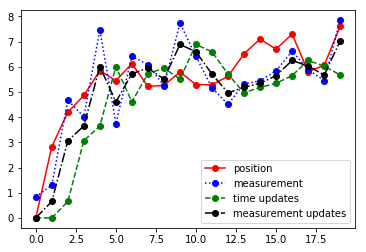

In [2]:
x_pred = np.zeros(T)
x_meas = np.zeros(T)
sigma_pred = np.zeros(T)
sigma_meas = np.zeros(T)

for t in range(0,T-1):
    #time update
    x_pred[t+1] = x_meas[t]
    sigma_pred[t+1] = sigma_meas[t] + sigma_2
    
    #Kalman gain
    k = sigma_pred[t+1]/(sigma_pred[t+1] + sigma_m_2)
    
    #measurement update
    x_meas[t+1] = x_pred[t+1] + k*(y[t+1] - x_pred[t+1])
    sigma_meas[t+1] = sigma_pred[t+1] - k*sigma_pred[t+1]

plt.plot(np.arange(0,T),x,'ro-',label='position')
plt.plot(np.arange(0,T),y,'bo:',label='measurement')
plt.plot(np.arange(0,T),x_pred,'go--',label='time updates')
plt.plot(np.arange(0,T),x_meas,'ko-.',label='measurement updates')
plt.legend()
plt.show()

At each time step, we can see that the time updates merely propagate the measurement update from the previous time. Then, the measurement update takes a linear combination of the time update at the measurement at time t.

You can see that the Kalman filter "smooths out" the measurement vector. In fact, one can interpret the Kalman filter as an adaptive low-pass filter.

Finally, we plot the estimate variance for the time and measurement updates. Note that they approach a steady-state value -- and this value is smaller than the measurement variance!

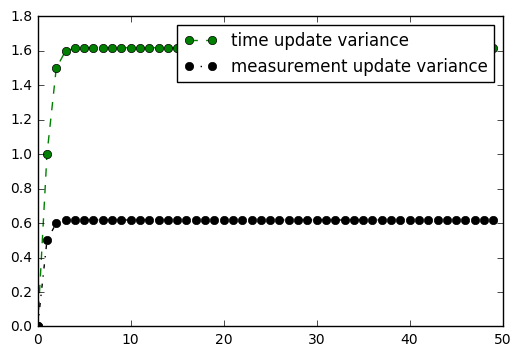

In [27]:
plt.plot(np.arange(0,T),sigma_pred,'go--',label='time update variance')
plt.plot(np.arange(0,T),sigma_meas,'ko-.',label='measurement update variance')
plt.legend()
plt.show()